<a href="https://colab.research.google.com/github/Kishorecsmani/ScalerProject/blob/main/InsuranceCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='33A2FF'><b>Problem Statement

<font color='33A2FF'>1) Which variables are significant in predicting the reason for hospitalization for different regions

<font color='33A2FF'>2) How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
!gdown 1NQrJQNyiAfX2joDawm8zcDEbawLbLZCA

In [ ]:
df = pd.read_csv("hospitals.csv")
df.head(10)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601
7,7,37,female,no,northwest,9.25,3,18204
8,8,37,male,no,northeast,9.94,2,16016
9,9,60,female,no,northwest,8.61,0,72308


In [ ]:
df = df.iloc[ : , 1 :]  #removing the unnamed index
df.head(10)

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
8,37,male,no,northeast,9.94,2,16016
9,60,female,no,northwest,8.61,0,72308


<font color='33A2FF'><b>1.Identification of variables and data types:</b></font>

In [ ]:
#rows ans columns of data
df.shape

(1338, 7)

In [ ]:
#checking datatypes
df.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [ ]:
# Number of records with No Null value
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<font color='33A2FF'><b>2.Analysing the basic metrics :</b></font>

In [ ]:
# describe on column having integer data type
df.describe(include=[np.number])

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [ ]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

age                        0.0
sex                        0.0
smoker                     0.0
region                     0.0
viral load                 0.0
severity level             0.0
hospitalization charges    0.0
dtype: float64

<font color='#0dab7f'>No missing/null values in all the columns Hence Missing value treatment is not required</font>

In [ ]:
#number of unique values in our data
for i in df.columns:
  print(i, " : ", df[i].nunique())

age  :  47
sex  :  2
smoker  :  2
region  :  4
viral load  :  462
severity level  :  6
hospitalization charges  :  1320


<font color='#0dab7f'>Categorical columns : Sex, Smoker, Region </font>

<font color='#0dab7f'>Non Categorical columns : Age, Viral Load, Severity level, Hospitalization charges</font>

##<font color='33A2FF'><b> **UNIVARIATE ANALYSIS**

In [ ]:
#Function for Univariate plot for numerical
def univariateNumerical(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure(figsize=(25,5))
  plt.subplot(1,2,1)
  plt.title("HIST PLOT")
  sns.histplot(data = df, x= col, kde=True, color = 'orange' )
  #plt.subplot(1,3,2)
  #plt.title("COUNT PLOT")
  #sns.countplot(data = df, x= col)
  plt.subplot(1,2,2)
  plt.title("BOX PLOT")
  sns.boxplot(x = col, data = df, color = 'green')
  plt.show()

In [ ]:
#Function for Univariate plot for Discrete
def univariateDiscrete(df, col):
  print("Describe Method")
  print(df[col].describe())
  print('\n\n')
  print("Value count Method")
  print(df[col].value_counts().head(10))
  plt.figure()  
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= col)
  plt.xticks(rotation = 90)
  plt.show()

<font color='33A2FF'><b> Outlier Detection 

In [ ]:
# Function to calculate outlier range
def outlier(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  print(" ")
  print('\033[1m'+'\033[95m' +'OUTLIER FOR COLUMN : '+ col )
  print("Outliers:",sum(df[col] > ub) + sum(df[col] < lb))
  print("Lower limit", lb)
  print("Upper limit", ub ,'\033[0m')

In [ ]:
def outlierRemoval(df, col): 
  r = 1.5 * stats.iqr(df[col])
  lb = max(np.percentile(df[col], 25) - r, 0)
  ub = np.percentile(df[col], 75) + r
  df = df[(df[col]>=lb) & (df[col]<=ub)]
  return df

Describe Method
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64



Value count Method
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
Name: age, dtype: int64


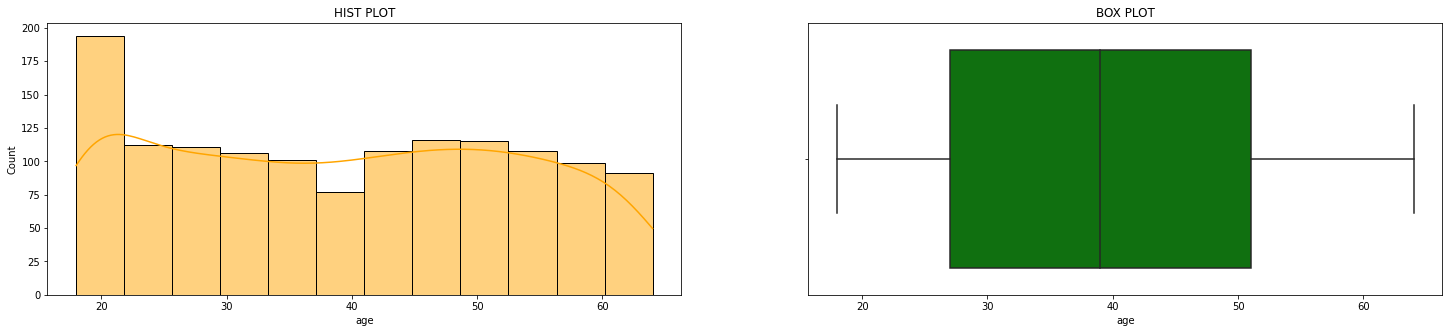

 
OUTLIER FOR COLUMN : age
Outliers: 0
Lower limit 0
Upper limit 87.0 


In [ ]:
# age
univariateNumerical(df, 'age')
outlier(df, 'age')

<font color='#0dab7f'><b>Observation</b>: 50% of the primary age is around 39 years for hospitalised cases</font>

<font color='#0dab7f'><b>Outlier</b> : Age - No Outliers in Age column</font>

Describe Method
count    1338.000000
mean       10.221233
std         2.032796
min         5.320000
25%         8.762500
50%        10.130000
75%        11.567500
max        17.710000
Name: viral load, dtype: float64



Value count Method
9.63     13
10.77    13
11.37    12
10.17    12
8.80     10
9.94     10
10.07    10
11.40     9
9.53      9
9.28      9
Name: viral load, dtype: int64


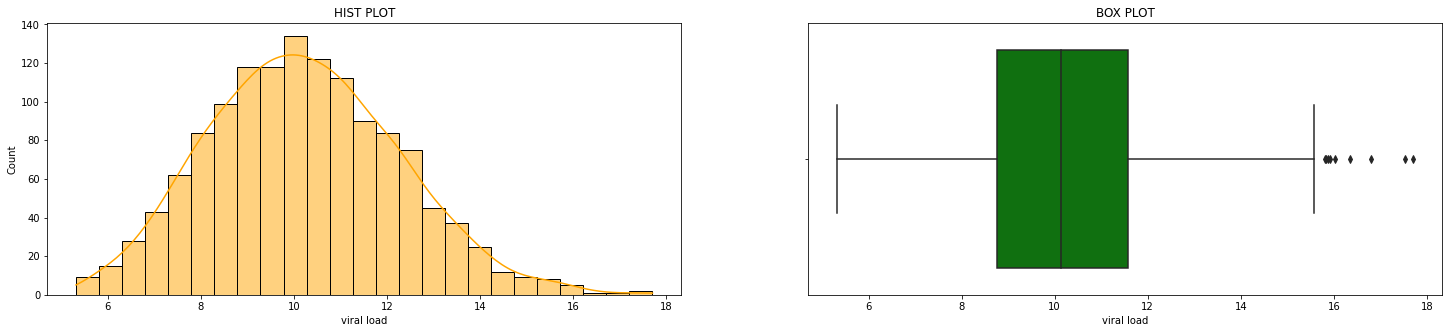

 
OUTLIER FOR COLUMN : viral load
Outliers: 9
Lower limit 4.554999999999997
Upper limit 15.775000000000002 


In [ ]:
# viral load
univariateNumerical(df, 'viral load')
outlier(df, 'viral load')

In [ ]:
# Outlier removal
df = outlierRemoval(df, 'viral load')

Describe Method
count    1329.000000
mean       10.179225
std         1.973408
min         5.320000
25%         8.740000
50%        10.100000
75%        11.500000
max        15.580000
Name: viral load, dtype: float64



Value count Method
9.63     13
10.77    13
10.17    12
11.37    12
10.07    10
8.80     10
9.94     10
9.44      9
11.40     9
9.97      9
Name: viral load, dtype: int64


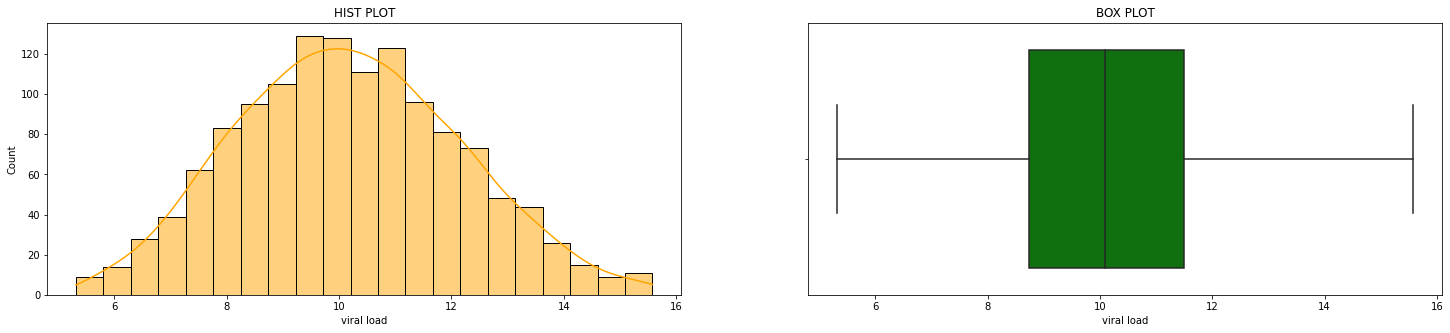

 
OUTLIER FOR COLUMN : viral load
Outliers: 0
Lower limit 4.6000000000000005
Upper limit 15.64 


In [ ]:
# After outlier treatment
univariateNumerical(df, 'viral load')
outlier(df, 'viral load')

<font color='#0dab7f'><b>Observation</b>: Viral load 9.63 and 10.77 has highest count </font>

<font color='#0dab7f'><b>Outlier</b> : Viral Load - Lower limit : 4.5 and Upper limit : 15.77. Outliers has been removed</font>

Describe Method
count    1329.000000
mean        1.096313
std         1.207928
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: severity level, dtype: float64



Value count Method
0    571
1    320
2    238
3    157
4     25
5     18
Name: severity level, dtype: int64


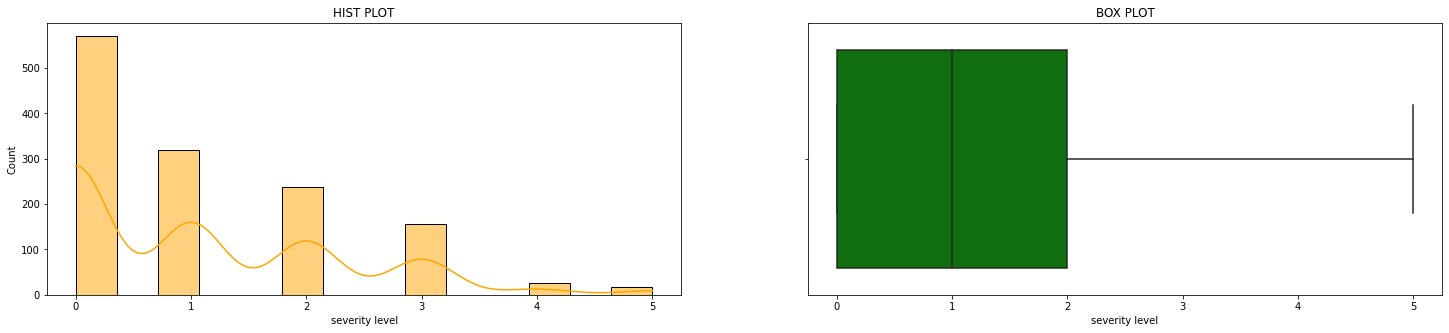

 
OUTLIER FOR COLUMN : severity level
Outliers: 0
Lower limit 0
Upper limit 5.0 


In [ ]:
# severity level
univariateNumerical(df, 'severity level')
outlier(df, 'severity level')

<font color='#0dab7f'><b>Observation</b>: Severity level 0 has highest count </font>

<font color='#0dab7f'><b>Outlier</b> : severity level - No Outliers in severity level column</font>

Describe Method
count      1329.000000
mean      33030.836719
std       29993.093106
min        2805.000000
25%       11846.000000
50%       23403.000000
75%       41466.000000
max      156482.000000
Name: hospitalization charges, dtype: float64



Value count Method
4593     2
23618    2
4055     2
62288    2
5544     2
5509     2
35003    2
16501    2
35986    2
4080     2
Name: hospitalization charges, dtype: int64


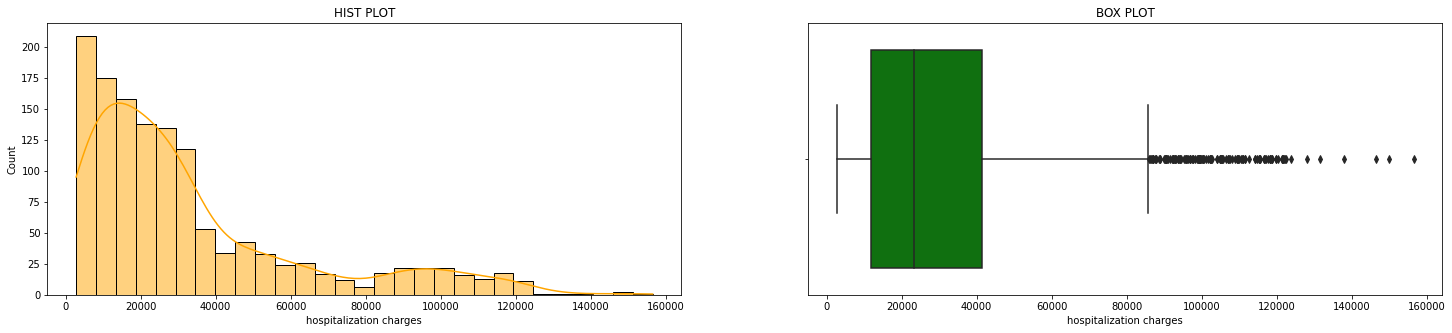

 
OUTLIER FOR COLUMN : hospitalization charges
Outliers: 138
Lower limit 0
Upper limit 85896.0 


In [ ]:
# hospitalization charges
univariateNumerical(df, 'hospitalization charges')
outlier(df, 'hospitalization charges')

<font color='#0dab7f'><b>Observation</b>: most of the hospitalization charges are around 23000 </font>

<font color='#0dab7f'><b>Outlier</b> : hospitalization charges - 138 Outliers in hospitalization charges column</font>

Describe Method
count     1191.000000
mean     24752.761545
std      17968.444708
min       2805.000000
25%      11022.000000
50%      20868.000000
75%      32384.000000
max      85758.000000
Name: hospitalization charges, dtype: float64



Value count Method
4055     2
4593     2
11799    2
5544     2
26486    2
23618    2
6773     2
62288    2
5509     2
4319     2
Name: hospitalization charges, dtype: int64


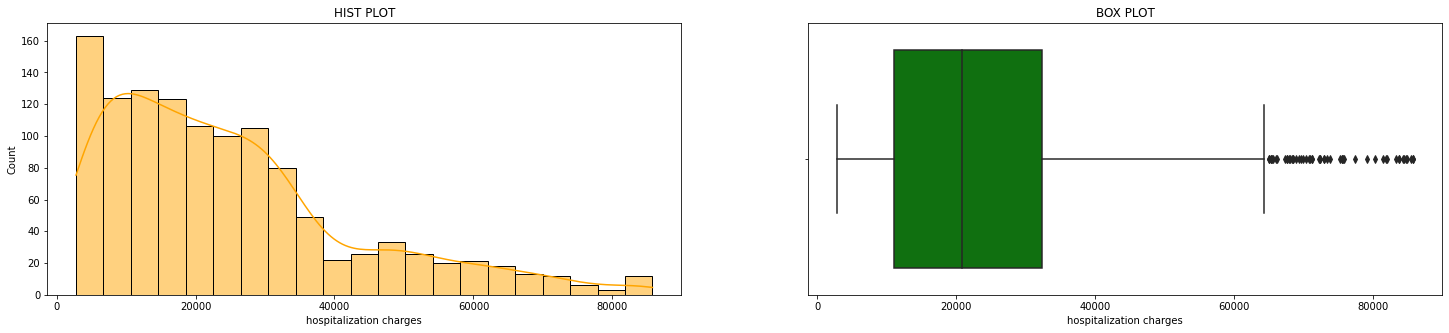

 
OUTLIER FOR COLUMN : hospitalization charges
Outliers: 53
Lower limit 0
Upper limit 64427.0 


In [ ]:
# Outlier removal
df = outlierRemoval(df, 'hospitalization charges')
# After outlier treatment
univariateNumerical(df, 'hospitalization charges')
outlier(df, 'hospitalization charges')

<font color='#0dab7f'><b>Outlier</b> : hospitalization charges - 138 Outliers in hospitalization charges column are removed</font>

Describe Method
count       1191
unique         2
top       female
freq         610
Name: sex, dtype: object



Value count Method
female    610
male      581
Name: sex, dtype: int64


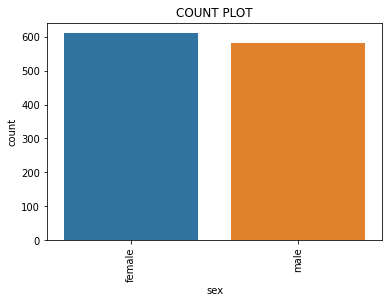

In [ ]:
#sex
univariateDiscrete(df, 'sex')

<font color='#0dab7f'><b>Observation</b>: Male and female hospitalisation count is almost equal</font>

Describe Method
count     1191
unique       2
top         no
freq      1055
Name: smoker, dtype: object



Value count Method
no     1055
yes     136
Name: smoker, dtype: int64


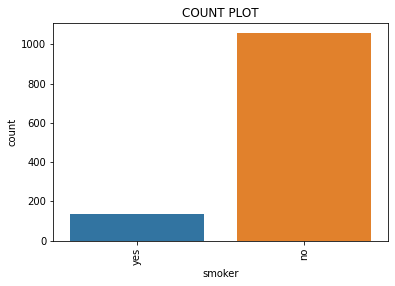

In [ ]:
#smoker
univariateDiscrete(df, 'smoker')

<font color='#0dab7f'><b>Observation</b>: Non smoker count is more when compared with smoker count</font>

Describe Method
count          1191
unique            4
top       northwest
freq            305
Name: region, dtype: object



Value count Method
northwest    305
southeast    301
northeast    295
southwest    290
Name: region, dtype: int64


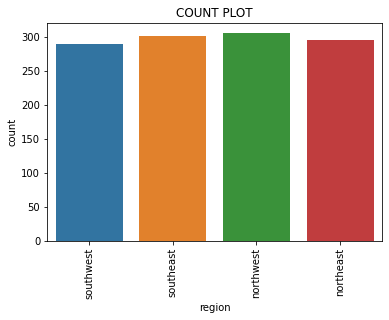

In [ ]:
#region
univariateDiscrete(df, 'region')

<font color='#0dab7f'><b>Observation</b>: Southeast and NorthWest region count is little more when compared to other regions. 

##<font color='33A2FF'><b> **BIVARIATE ANALYSIS**

In [ ]:
# function for Continuous vs discrete BIVARIATE Analysis
def cont_discrete_bivarite(df, x_dis, y_con):
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.title("BOX PLOT")
  sns.boxplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,2)
  plt.title("VIOLIN PLOT")
  sns.violinplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.subplot(1,3,3)
  plt.title("BAR PLOT")
  sns.barplot(data = df, x= x_dis, y= y_con)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
# function for discrete vs discrete BIVARIATE Analysis
def discrete_discrete_bivarite(df, x_dis, hue = None ):
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.title("COUNT PLOT")
  sns.countplot(data = df, x= x_dis, hue=hue)
  plt.show()

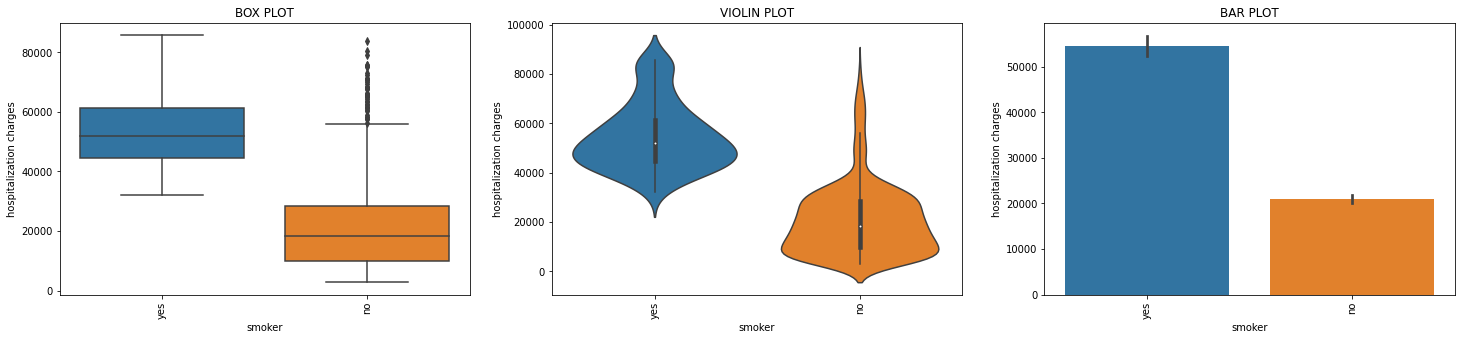

In [ ]:
# Hospitalization charges vs smoker ########
cont_discrete_bivarite(df, 'smoker', 'hospitalization charges')

<font color='#0dab7f'><b>Observation</b>: Hospitalization charges for smoker is around 50000 and it is very high compared with non-smoker (20000).</font>

<font color='#0dab7f'><b>Recommendation</b>:

<font color='#0dab7f'>1) As Hospitalization charges for smoker is high and higher chance of getting disease, Hence Hospital/employers can recommend good insurance companies which they have tie up to give higher insurance coverage for smoking people</font>

<font color='#0dab7f'>2) Hospitals should recommend good rehabilitation centre so that smoking people can change their smoking habit in long run.</font>


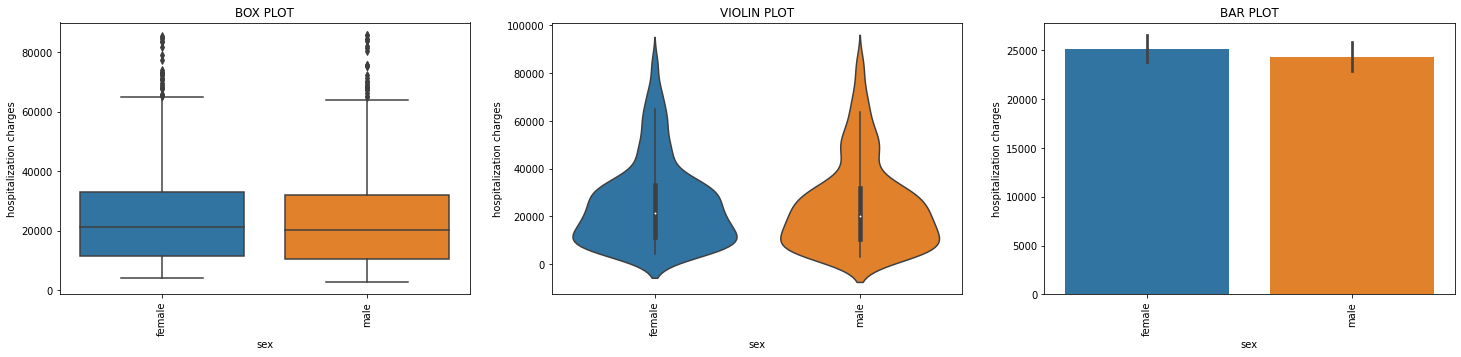

In [ ]:
# Sex vs Hospitalization charges 
cont_discrete_bivarite(df, 'sex', 'hospitalization charges')

<font color='#0dab7f'><b>Observation</b>: Hospitalization charges for female is little higher compared with males.</font>

<font color='#0dab7f'><b>Recommendation</b>:
As Hospitalization charges for female is little high and to avoid financial crisis due to medical emergencies like covid 19, Hence Hospital/employers can recommend good insurance companies to cover females</font>

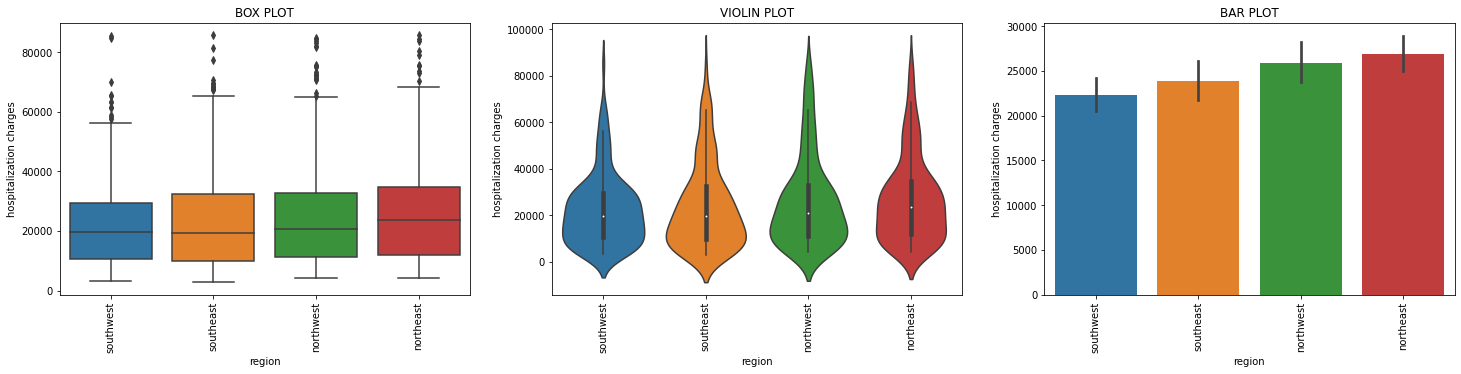

In [ ]:
# Region vs hospitalization charges
cont_discrete_bivarite(df, 'region', 'hospitalization charges')

<font color='#0dab7f'><b>Observation</b>: Hospitalization charges for north east people of Delhi is high compared with other regions.</font>

<font color='#0dab7f'><b>Recommendation</b>:
<font color='#0dab7f'> 1) As Hospitalization charges for north east people of Delhi is little high, Hence Hospital can recommend good insurance companies to cover north east region peoples 

<font color='#0dab7f'>2) Government can bring more oxygen cylinders to north east of Delhi as the hospitalization count is more </font>

<font color='#0dab7f'>3) Government should bring awareness among the people such as social distancing, washing hands often, wearing masks and Quarantine themselves </font>


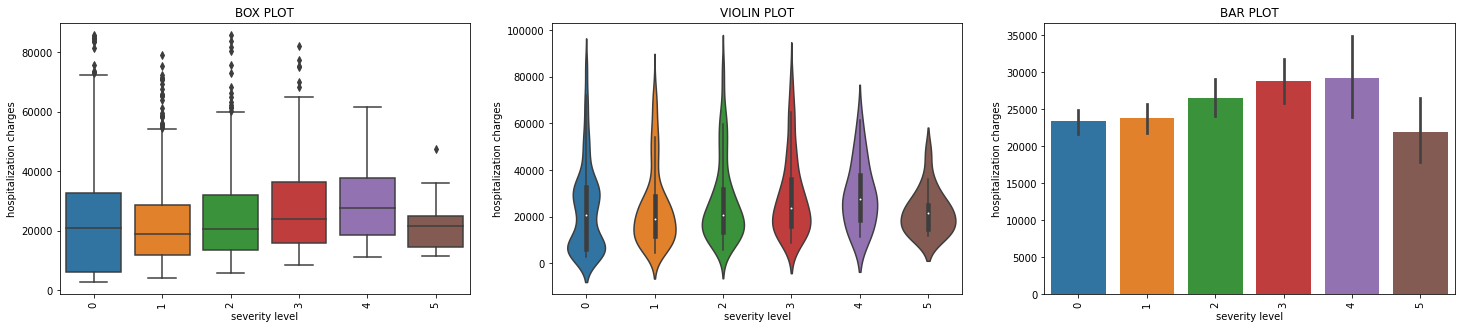

In [ ]:
# severity level vs hospitalization charges
cont_discrete_bivarite(df, 'severity level', 'hospitalization charges')

<font color='#0dab7f'><b>Observation</b>: Hospitalization charges for people with severity level 3 and 4 is high compared with other levels.</font>

<font color='#0dab7f'><b>Recommendation</b>:

<font color='#0dab7f'>1) Hospital can recommend insurance companies to cover the patients with high severity level people </font>

<font color='#0dab7f'>2) Government can stock more oxygen cylinders to deal with high severity people</font>

<font color='#0dab7f'>3) Government should bring awareness among the people such as social distancing, washing hands often, wearing masks and Quarantine themselves </font>

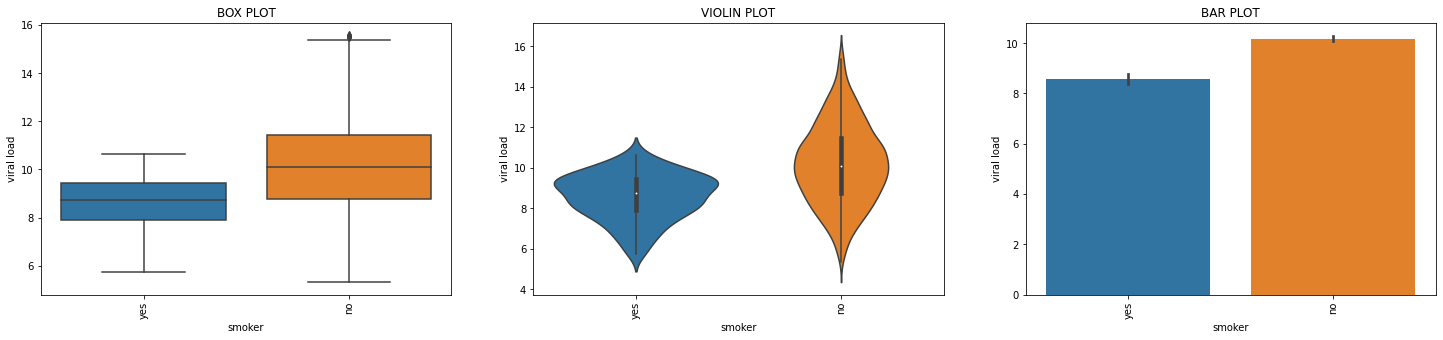

In [ ]:
# smoker vs viral load
cont_discrete_bivarite(df, 'smoker', 'viral load')

<font color='#0dab7f'><b>Observation</b>: Viral load for non somker is higher compared with smoker</font>

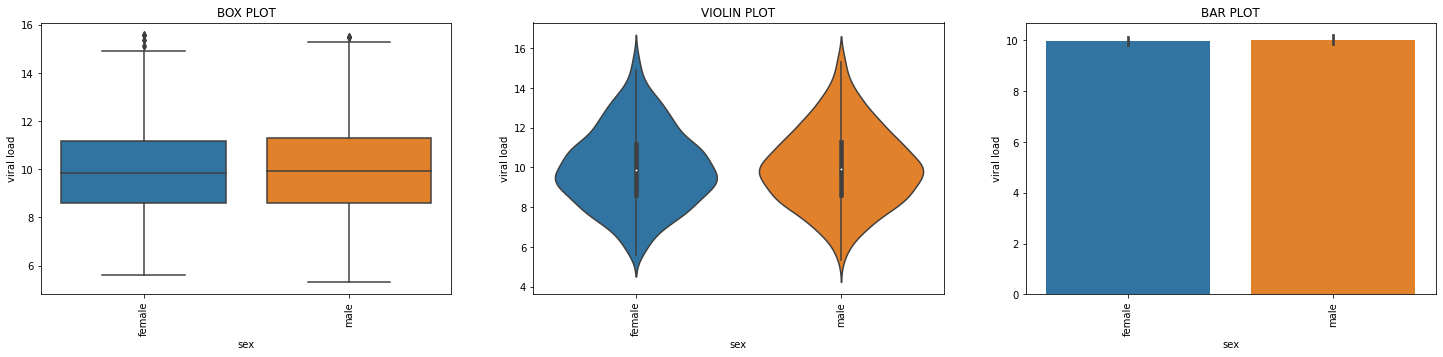

In [ ]:
# sex vs viral load ########
cont_discrete_bivarite(df, 'sex', 'viral load')

<font color='#0dab7f'><b>Observation</b>: Male and female is having almost same viral load.</font>

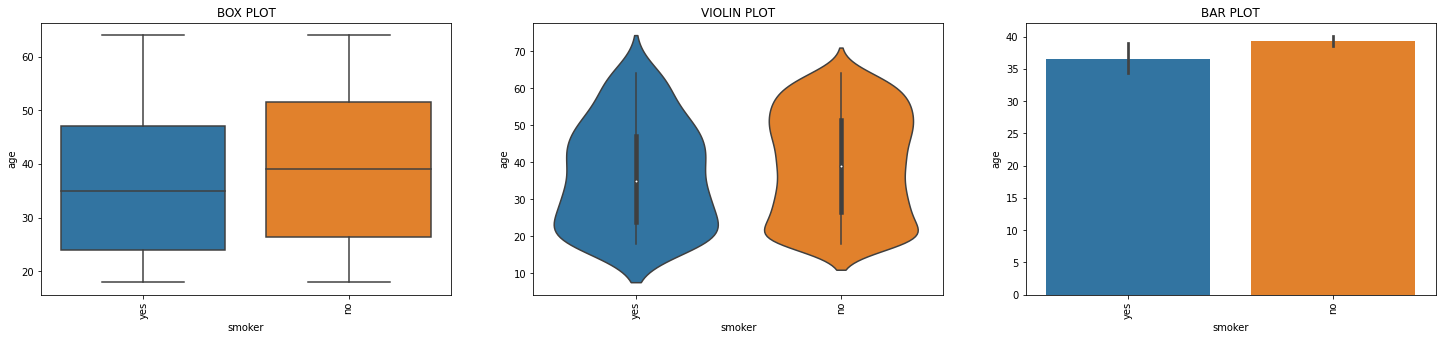

In [ ]:
# Smoker vs age
cont_discrete_bivarite(df, 'smoker', 'age')

<font color='#0dab7f'><b>Observation</b>: Average age of people who are smoking are around 36 years.</font>

<font color='#0dab7f'><b>Recommendation</b>: Smoking/Tobacco awareness program should be given to the age group of 30 to 40 years</font>

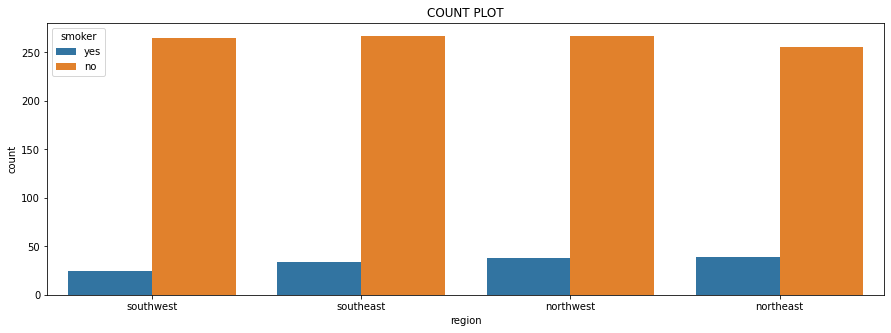

In [ ]:
# Smoker vs region  ########
discrete_discrete_bivarite(df, 'region', 'smoker')

<font color='#0dab7f'><b>Observation</b>: More count in north east region for Smoking people</font>

<font color='#0dab7f'><b>Recommendation</b>: Smoking/Tobacco awareness program should be given to north east region of Delhi where the smoking people strength is more </font>

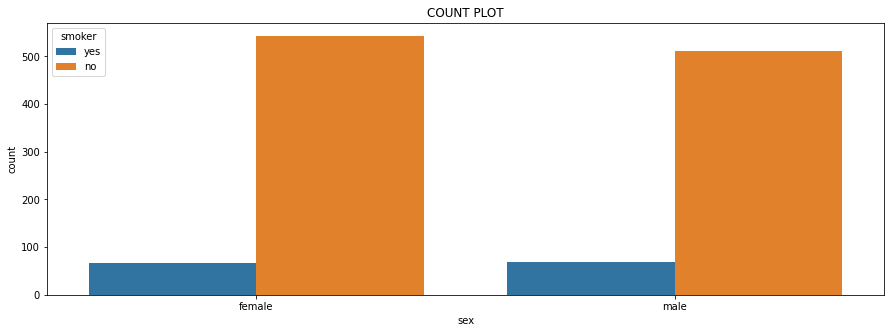

In [ ]:
# sex vs smoker
discrete_discrete_bivarite(df, 'sex', 'smoker')

<font color='#0dab7f'><b>Observation</b>: Male smoker is more when compared with female</font>

<font color='#0dab7f'><b>Recommendation</b>: Smoking/Tobacco habit is more for males hence awareness on smoking / Tobacco should be given to males</font>

**<font color='33A2FF'><b>CORRELATION MATRIX**

In [ ]:
df_corr = df.corr( )
df_corr

,age,viral load,severity level,hospitalization charges
age,1.000000,0.123870,0.038179,0.448798
viral load,0.123870,1.000000,0.007495,-0.064444
severity level,0.038179,0.007495,1.000000,0.089083
hospitalization charges,0.448798,-0.064444,0.089083,1.000000


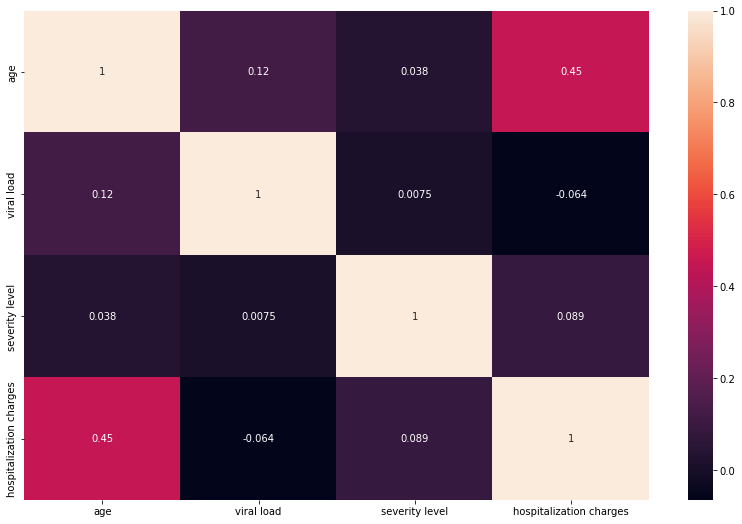

In [ ]:
# HeatMap: All continuos variables
plt.subplots(figsize=(14, 9))
sns.heatmap(df_corr, xticklabels=df_corr.columns.values, yticklabels=df_corr.columns.values, annot = True)
plt.show()

<font color='#0dab7f'> There is no correlation among the numerical columns.

In [ ]:
# Creating 7 bins for age groups of persons.

bins = [0,17,27,37,47,57,67,100]
labels = ['0-17','17-27','27-37','37-47','47-57','57-67','67-100']
df['age groups'] = pd.cut(x = df['age'], bins = bins, labels = labels)
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age groups
0,19,female,yes,southwest,9.30,0,42212,17-27
1,18,male,no,southeast,11.26,1,4314,17-27
2,28,male,no,southeast,11.00,3,11124,27-37
3,33,male,no,northwest,7.57,0,54961,27-37
4,32,male,no,northwest,9.63,0,9667,27-37


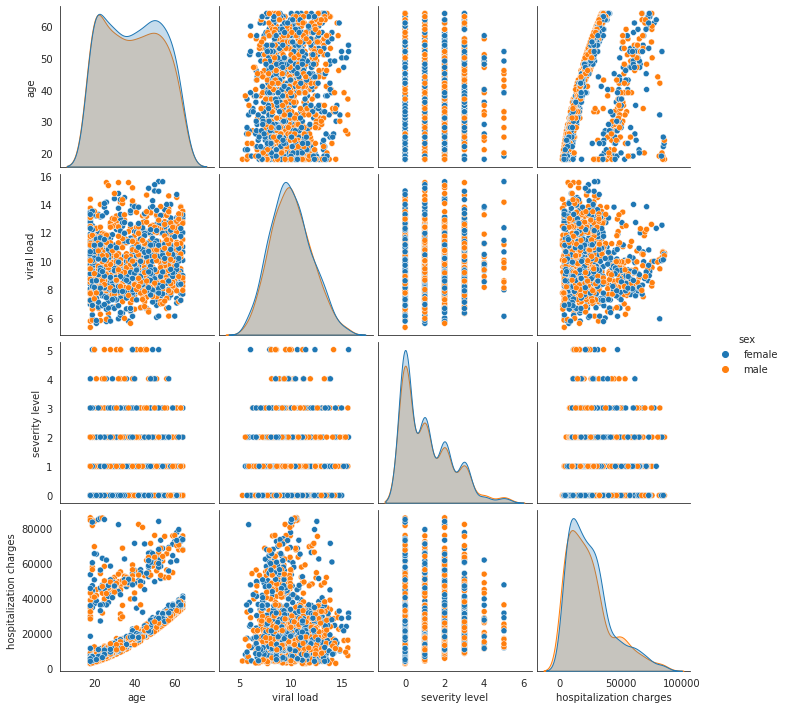

In [ ]:
#Quick overview of the data w.r.t sex

sns.set_style('white')
sns.pairplot(df,hue='sex')
plt.show()

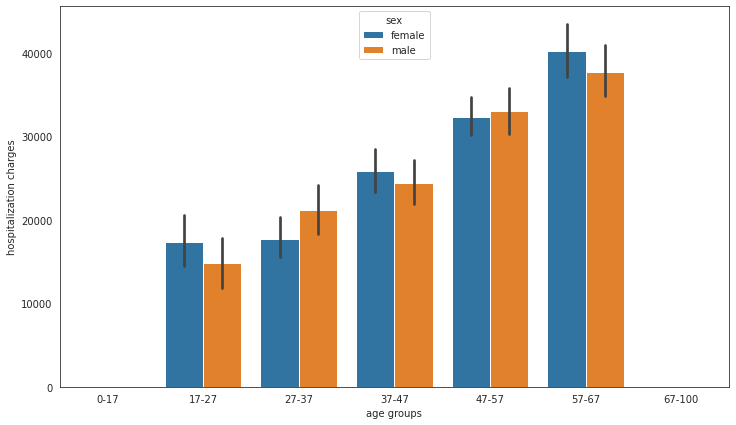

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'age groups', y = 'hospitalization charges', data = df, hue = 'sex')
plt.show()

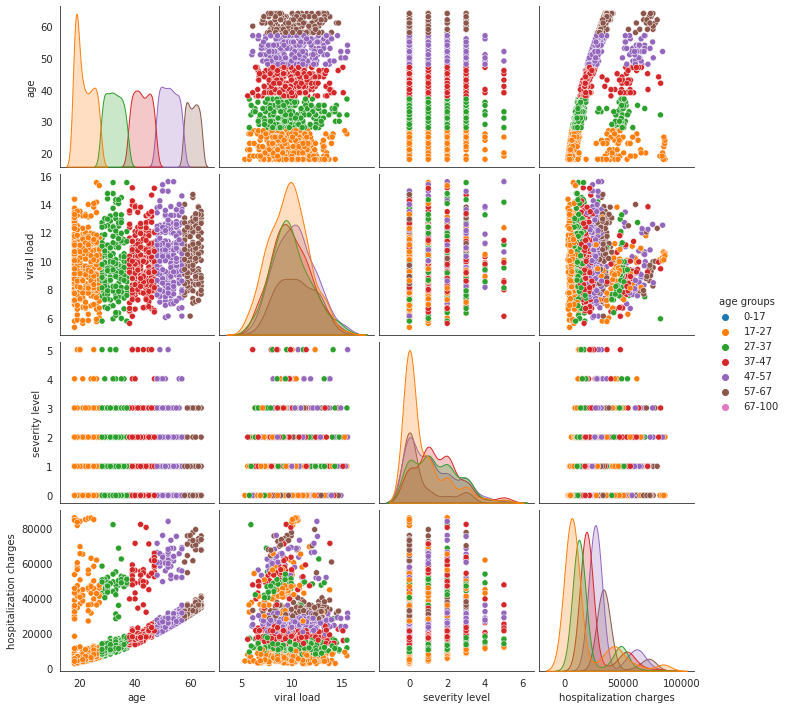

In [ ]:
#Quick overview of the data w.r.t sex

sns.set_style('white')
sns.pairplot(df,hue='age groups')
plt.show()

<font color='33A2FF'>Summary:

<font color='33A2FF'> As we can see from the population distribution plot for male and females, the number if persons are similar from both the groups. There's a slight increase in the charges for males than females which can be thought in terms of the slightly higher number of aged males getting admitted as compared to aged females. And this fact can be seen in the barplot where I have focused more on age analysis as we found high corelation between age and charges from the heatmap.

<font color='33A2FF'>As the age of the persons increases, the charges also increases as there might be few other complications along with COVID-19 in older people.

##<font color='33A2FF'><b> **HYPOTHESIS TESTING**

In [ ]:
import statsmodels.api as sm 
# function to check the distribution is gausian or not, if not gausian , do transformation using box cox and output the gausian curve 
def toCheckNormality(df):
  sns.displot(df, kde = True)
  plt.plot()
  plt.title("distribution of group before applying transformation")
  fig = sm.qqplot(df, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group before applying transformation")

def boxcoxtransform(df):
  df_t, l = stats.boxcox(df) 
  fig = sm.qqplot(df_t, line = '45', fit = True)
  plt.plot()
  plt.title("qq plot of group after applying transformation")
  sns.displot(df_t, kde = True)
  plt.plot()
  plt.title("distribution of group after applying transformation")
  plt.show()
  return df_t, l

<font color='#0000FF'> Q-1. Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? <font color='#0000FF'>

In [ ]:
# Right tailed test
# To test the mean hospitalization charges of smoking greater than non smoking people

# Assumptions
# Observation in each sample are independent and identically distributed
# Observation in each sample are normally distributed
# Observation in each sample have the same variance


# H0 - Mean hospitalization charges of smoking is less than or equal to non smoking people.
# H1 - Means hospitalization charges of smoking greater than non smoking people.

In [ ]:
df_smoker = df.loc[df['smoker'] == 'yes']['hospitalization charges'].sample(109)
df_non_smoker = df.loc[df['smoker'] == 'no']['hospitalization charges'].sample(109)

In [ ]:
print("no of rows for smoker",df_smoker.shape)
print("no of rows for smoker",df_non_smoker.shape)

no of rows for smoker (109,)
no of rows for smoker (109,)


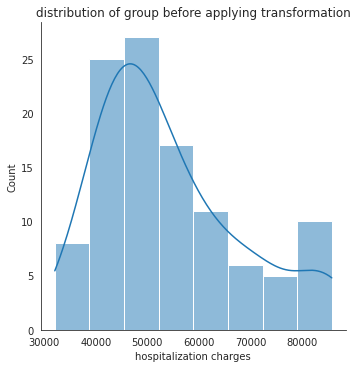

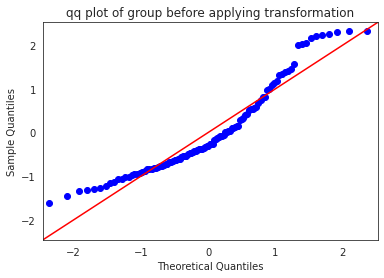

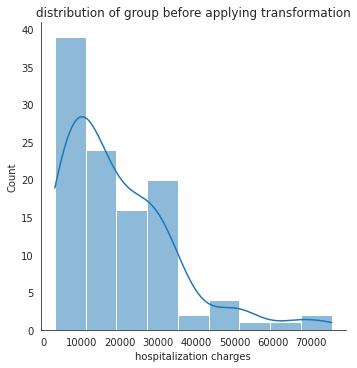

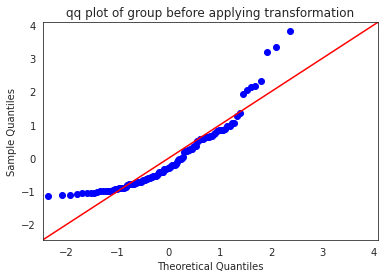

In [ ]:
# Assumptions validations:
# Normality checking
toCheckNormality(df_smoker)
toCheckNormality(df_non_smoker)

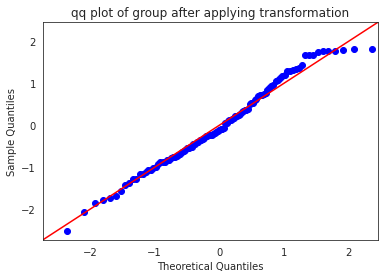

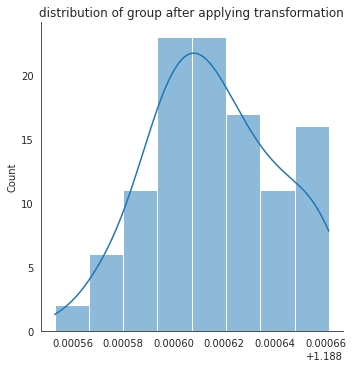

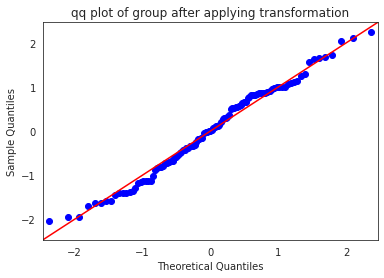

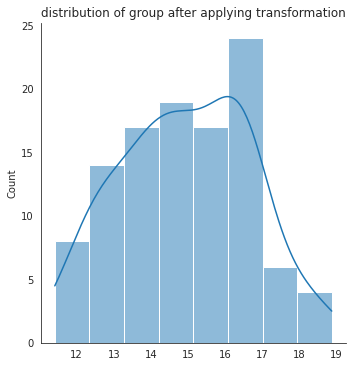

In [ ]:
# Smoker and non smoker hospitality charges are not normal hence applying boc cox transformation 
df_smoker_t, l1 = boxcoxtransform(df_smoker)
df_non_smoker_t, l2 = boxcoxtransform(df_non_smoker)

In [ ]:
m1 = np.mean(df_smoker_t)
s1 = np.std(df_smoker_t)
m2 = np.mean(df_non_smoker_t)
s2 = np.std(df_non_smoker_t)

print(m1, s1, m2, s2)

1.1886158417648842 2.501767084789827e-05 14.948747059747582 1.7455593317137839


In [ ]:
# Assumptions
# Observation in each sample are independent and identically distributed 
# Observation in each sample are normally distributed --- Box cox transformation applied
# Observation in each sample have the same variance -- checked the variance there is little difference in variance still we are continuing with right t test 

tobs, p = stats.ttest_ind(a = df_smoker, b = df_non_smoker, alternative = 'greater', equal_var=False)  
# alpha = 5%
# alternative
# less - the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample. 
# two-sided: the means of the distributions underlying the samples are unequal.
# greater: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

print("T Observation is : ", tobs ," and pvalue is : ", p)

T Observation is :  18.011844125130676  and pvalue is :  3.994189313081096e-45


<font color='#0dab7f'><b>Observation</b>: P Value is 0 % which is less than alpha 5% so we reject Null hypothesis. Hence according to T Test, Mean hospitalization charges of smoker is greater than non smoker</font>

<font color='#0000FF'> Q-2. Prove (or disprove) with statistical evidence that the viral load of females is different from that of males? <font color='#0000FF'>

In [ ]:
# two tailed t test

# To test the mean viral loads of female and male are same or different

# Assumptions
# Observation in each sample are independent and identically distributed
# Observation in each sample are normally distributed
# Observation in each sample have the same variance

# H0 - Mean viral loads of female and male are same .
# H1 - Mean viral loads of female and male are different.

In [ ]:
df_male_vl = df.loc[df['sex'] == 'male']['viral load']
df_female_vl = df.loc[df['sex'] == 'female']['viral load']

In [ ]:
print("no of rows for male viral loads",df_male_vl.shape)
print("no of rows for female viral loads",df_female_vl.shape)

no of rows for male viral loads (581,)
no of rows for female viral loads (610,)


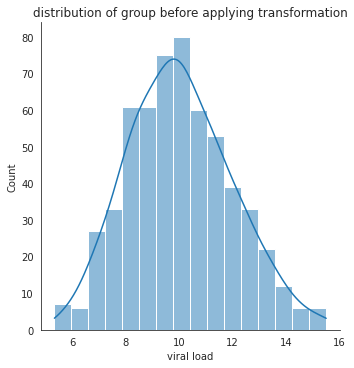

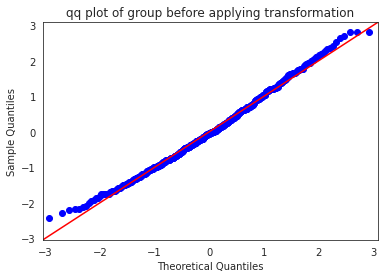

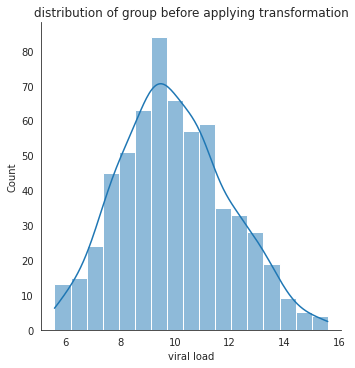

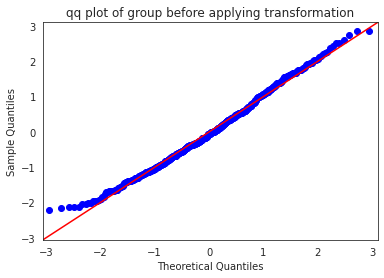

In [ ]:
# Assumptions validations:
# Normality checking
toCheckNormality(df_male_vl)
toCheckNormality(df_female_vl)

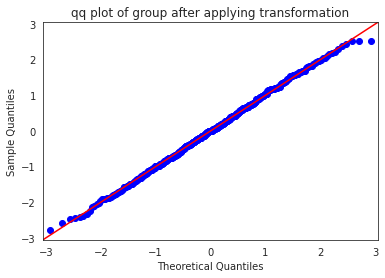

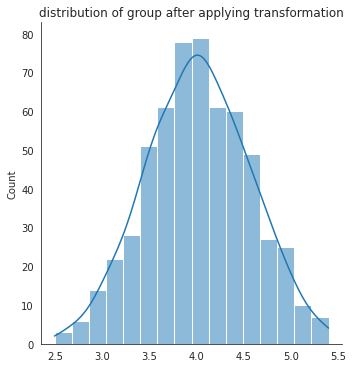

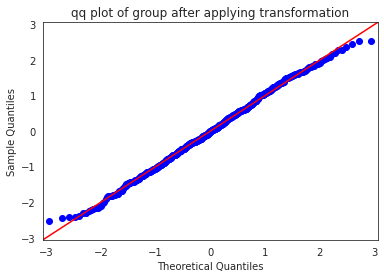

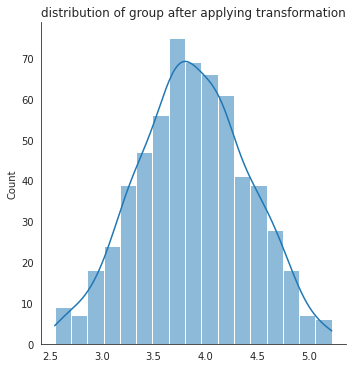

In [ ]:
# viral loads of male and female are not normal hence applying boc cox transformation 
df_male_vl_t, l1 = boxcoxtransform(df_male_vl)
df_female_vl_t, l2 = boxcoxtransform(df_female_vl)

In [ ]:
m1 = np.mean(df_male_vl_t)
s1 = np.std(df_male_vl_t)
m2 = np.mean(df_female_vl_t)
s2 = np.std(df_female_vl_t)

print(m1, s1, m2, s2)

4.016902471061076 0.5475107377130795 3.8782555236894263 0.528385746755192


In [ ]:
# Assumptions
# Observation in each sample are independent and identically distributed 
# Observation in each sample are normally distributed --- Box cox transformation applied
# Observation in each sample have the same variance -- checked the variance and looks equal 

tobs, p = stats.ttest_ind(a = df_male_vl, b = df_female_vl, alternative = 'two-sided')  
# alpha = 5%
# alternative
# less - the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample. 
# two-sided: the means of the distributions underlying the samples are unequal.
# greater: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

print("T Observation is : ", tobs ," and pvalue is : ", p)

T Observation is :  0.5675665685649349  and pvalue is :  0.5704364600211779


<font color='#0dab7f'><b>Observation</b>: P Value is 9.67 * 10^-6 % which is less than alpha 5% so we reject Null hypothesis. Hence according to T Test, Mean viral loads of male and female is not same</font>

<font color='#0000FF'> Q-3. Is the proportion of smoking significantly different across different regions? <font color='#0000FF'>

In [ ]:
# Chi-squared test
# test whether two categorical variables are related or independent

#Assumptions
# Observations used in the calculation of the contingency table are independent.
# All expected values are at least 5 

# h0 - smoking is independent of regions
# h1 - smoking is dependent of regions

In [ ]:
obs_t = pd.crosstab( df['smoker'], df['region'], margins= True, dropna=True)  # values= df['hospitalization charges'], aggfunc=sum, 
obs_t = obs_t.fillna(0)
print(obs_t)

region  northeast  northwest  southeast  southwest   All
smoker                                                  
no            256        267        267        265  1055
yes            39         38         34         25   136
All           295        305        301        290  1191


In [ ]:
# Under h0 - smoker is independent of regions
# under h1 - smoking is dependent of regions

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(obs_t)
print('stat=%.3f, p=%.3f' % (stat, p))
print("Expected value : ", expected)

stat=3.522, p=0.897
Expected value :  [[ 261.31402183  270.17212427  266.62888329  256.88497061 1055.        ]
 [  33.68597817   34.82787573   34.37111671   33.11502939  136.        ]
 [ 295.          305.          301.          290.         1191.        ]]


<font color='#0dab7f'><b>Observation</b>: P Value is 0.897 which is more than alpha 0.05 so we fail to reject Null hypothesis. Hence according to chi square test, smokers proportion is not significantly different in different regions </font>

<font color='#0000FF'> Q-4. Is the mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence <font color='#0000FF'>

In [ ]:
# One way Anova test 
# To test mean viral load of women is same or different across the different severity level 0, 1, 2

# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian 
# 2) Each group variance is roughly the same
# 3) Each observation are independent

In [ ]:
df_women_vl0 = df.loc[(df['sex'] == 'female') & (df['severity level'] == 0)]['viral load']
df_women_vl1 = df.loc[(df['sex'] == 'female') & (df['severity level'] == 1)]['viral load']
df_women_vl2 = df.loc[(df['sex'] == 'female') & (df['severity level'] == 2)]['viral load']

print("no of values for women viral load 0 : ", df_women_vl0.shape)
print("no of values for women viral load 1: ", df_women_vl1.shape)
print("no of values for women viral load 2 : ", df_women_vl2.shape)

no of values for women viral load 0 :  (268,)
no of values for women viral load 1:  (147,)
no of values for women viral load 2 :  (106,)


In [ ]:
# minimum value is 119 so we make all 3 to size of 119 
df_women_vl_0 = df_women_vl0.head(119)
df_women_vl_1 = df_women_vl1.head(119)

In [ ]:
print("no of values for women viral load 0 : ", df_women_vl_0.shape)
print("no of values for women viral load 1: ", df_women_vl_1.shape)
print("no of values for women viral load 2 : ", df_women_vl2.shape)

no of values for women viral load 0 :  (119,)
no of values for women viral load 1:  (119,)
no of values for women viral load 2 :  (106,)


In [ ]:
# ANNOVA to test mean viral load of women is same or different across the different severity level
# Ho : mean viral load for female is same across severity level 0, 1, 2. 
# Ha : mean viral load for female is different across severity level 0, 1, 2.

# Mu1 = mean viral load for female for severity level 0
# Mu2 = mean viral load for female for severity level 1
# Mu3 = mean viral load for female for severity level 2

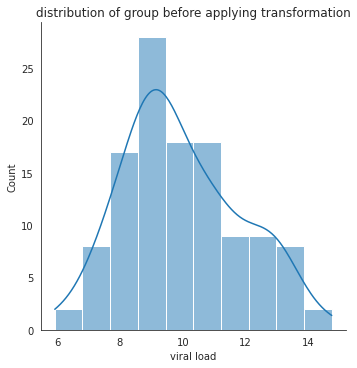

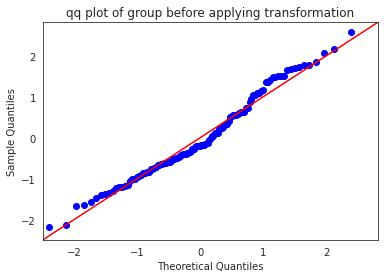

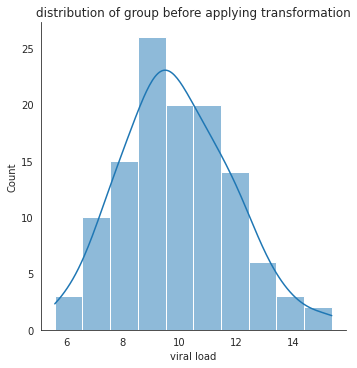

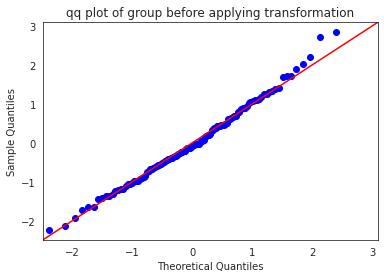

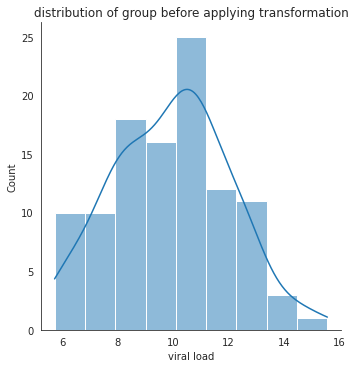

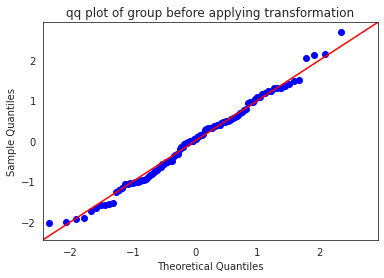

In [ ]:
# Assumptions validations:
# Normality checking
toCheckNormality(df_women_vl_0)
toCheckNormality(df_women_vl_1)
toCheckNormality(df_women_vl2)

===================================================Group1========================================


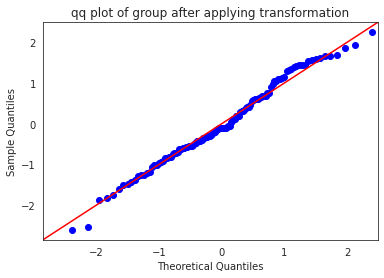

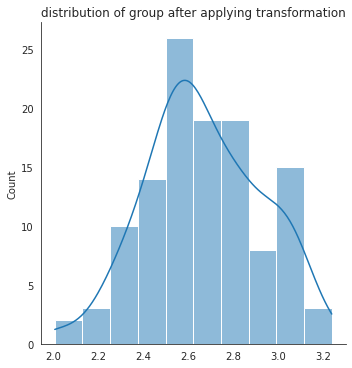

lambda1 :  0.13326621251000773
===================================================Group2========================================


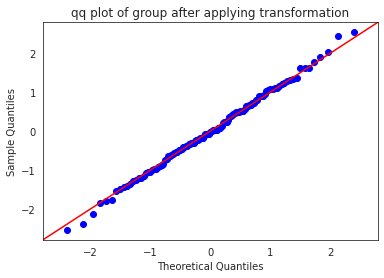

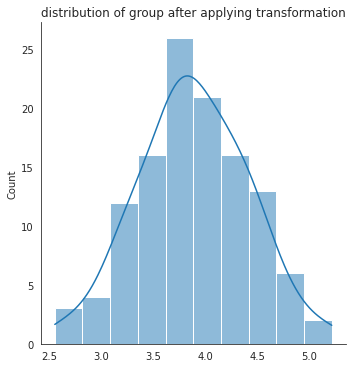

lambda2 :  0.43169395502815794
==================================================Group3=========================================


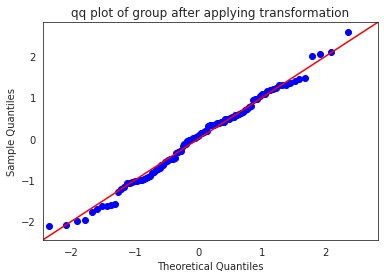

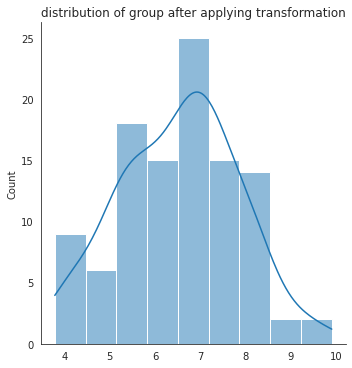

lambda3 :  0.7955337133622341


In [ ]:
# viral load for female for different severity level are not normal hence applying boc cox transformation 
print("===================================================Group1========================================")
df_women_vl_0_t, l1 = boxcoxtransform(df_women_vl_0)
print("lambda1 : " , l1)

print("===================================================Group2========================================")
df_women_vl_1_t, l2 = boxcoxtransform(df_women_vl_1)
print("lambda2 : " , l2)

print("==================================================Group3=========================================")
df_women_vl_2_t, l3 = boxcoxtransform(df_women_vl2)
print("lambda3 : " , l3)

In [ ]:
m1 = np.mean(df_women_vl_0_t)
s1 = np.std(df_women_vl_0_t)
m2 = np.mean(df_women_vl_1_t)
s2 = np.std(df_women_vl_1_t)
m3 = np.mean(df_women_vl_2_t)
s3 = np.std(df_women_vl_2_t)

print((m1, s1), (m2,s2), (m3, s3))

(2.668692938405272, 0.25305970136421846) (3.886598552431544, 0.5246278057128367) (6.530300224781533, 1.3065092611521354)


In [ ]:
# Assumptions of ANOVA
# 1) Each group observations are gausian or nearly gausian (Distribution nearly looks like gausian after applying transformation)
# 2) Each group variance is roughly the same
# 3) Each observation are independent
# As above conditios met we are applying ANOVA single test
from scipy.stats import f_oneway
stat, p = f_oneway(df_women_vl0, df_women_vl1, df_women_vl2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.036, p=0.964


<font color='#0dab7f'><b>Observation</b>: P Value is 0% which is less than alpha 5% so we reject Null hypothesis. Hence according to ANOVA Test, mean viral load for female is different across severity level 0, 1, 2</font>

<font color='33A2FF'><b>CONFIDENCE INTERVAL- To cross check the Hypothesis test mean hosipitalization charges for smoking is greater than non smoking 

In [ ]:
def ConfidenceInterval1(df, col, category):
  print("Confidence interval -", col,":", category)
  df_p_f = df.loc[df[col]== category]['hospitalization charges']
  print(df_p_f.shape)
  size = 1000
  bootstraped_means = np.empty(size)
  for i in range(size):
    bootstrapped_sample = df_p_f.sample(len(df_p_f), replace = True)
    x_bar = np.mean(bootstrapped_sample)
    bootstraped_means[i] = x_bar
  confidence_interval_99 = np.percentile(bootstraped_means, [0.5, 99.5])
  confidence_interval_95 = np.percentile(bootstraped_means, [2.5, 97.5])
  confidence_interval_90 = np.percentile(bootstraped_means, [5, 95])
  print("Mean : ",np.mean(bootstraped_means))
  print("Std :", np.std(bootstraped_means))
  print("Confidence interval - 99% is :", confidence_interval_99)
  print("Confidence interval - 95% is :", confidence_interval_95)
  print("Confidence interval - 90% is :", confidence_interval_90)
  plt.hist(bootstraped_means, bins = 100,  density=True)
  plt.title("Distribution of sample mean")
  plt.axvline(x=confidence_interval_99[0], c='g')
  plt.axvline(x=confidence_interval_99[1], c='g')
  plt.axvline(x=confidence_interval_95[0], c='r')
  plt.axvline(x=confidence_interval_95[1], c='r')
  plt.axvline(x=confidence_interval_90[0], c='y')
  plt.axvline(x=confidence_interval_90[1], c='y')
  plt.legend(['99%', '99%', '95%', '95%', '90%', '90%'])
  plt.grid()
  plt.show()

Confidence interval - smoker : yes
(136,)
Mean :  54594.39338235294
Std : 1141.2685038399852
Confidence interval - 99% is : [51629.04772059 57867.22900735]
Confidence interval - 95% is : [52470.92738971 56855.31930147]
Confidence interval - 90% is : [52770.82389706 56437.26176471]


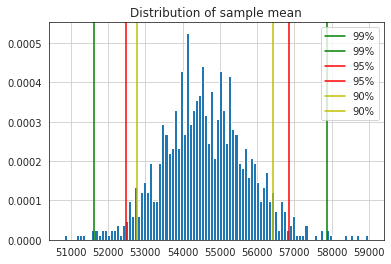

In [ ]:
ConfidenceInterval1(df, 'smoker', 'yes')

Confidence interval - smoker : no
(1055,)
Mean :  20897.518473933647
Std : 437.1097418755267
Confidence interval - 99% is : [19817.38335071 22076.03727488]
Confidence interval - 95% is : [20067.49959716 21752.23063981]
Confidence interval - 90% is : [20152.63393365 21594.76014218]


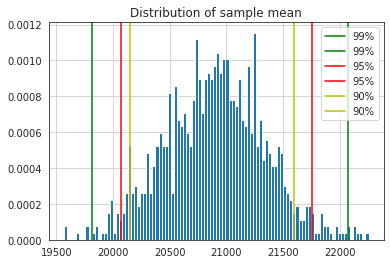

In [ ]:
ConfidenceInterval1(df, 'smoker', 'no')

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> Confidence interval of mean hospitalization charges of smoker is not overlapping with non smoker. It also proves that mean hospitalization charges for smoker is greater than non smoker and which is already proved using Hypothesis T-test right tailed

<font color='#0dab7f'><b>Recommendation</b>: 

<font color='#0dab7f'> 1) As Hospitalization charges for smoker is high and higher chance of getting disease, Hence Hospital/employers can recommend good insurance companies which they have tie up to give higher insurance coverage for smoking people

<font color='#0dab7f'>2) Smoking / Tobacco awareness program should be given to smoking people.

<font color='#0dab7f'>3) Smoking people should be sent to Rehabilitation centre to stop the smoking habits

<font color='33A2FF'><b>CONFIDENCE INTERVAL- To cross check the Hypothesis test, mean viral load of females is different from that of males 


In [ ]:
def ConfidenceInterval2(df, col, category):
  print("Confidence interval -", col,":", category)
  df_p_f = df.loc[df[col]== category]['viral load']
  print(df_p_f.shape)
  size = 1000
  bootstraped_means = np.empty(size)
  for i in range(size):
    bootstrapped_sample = df_p_f.sample(len(df_p_f), replace = True)
    x_bar = np.mean(bootstrapped_sample)
    bootstraped_means[i] = x_bar
  confidence_interval_99 = np.percentile(bootstraped_means, [0.5, 99.5])
  confidence_interval_95 = np.percentile(bootstraped_means, [2.5, 97.5])
  confidence_interval_90 = np.percentile(bootstraped_means, [5, 95])
  print("Mean : ",np.mean(bootstraped_means))
  print("Std :", np.std(bootstraped_means))
  print("Confidence interval - 99% is :", confidence_interval_99)
  print("Confidence interval - 95% is :", confidence_interval_95)
  print("Confidence interval - 90% is :", confidence_interval_90)
  plt.hist(bootstraped_means, bins = 100,  density=True)
  plt.title("Distribution of sample mean")
  plt.axvline(x=confidence_interval_99[0], c='g')
  plt.axvline(x=confidence_interval_99[1], c='g')
  plt.axvline(x=confidence_interval_95[0], c='r')
  plt.axvline(x=confidence_interval_95[1], c='r')
  plt.axvline(x=confidence_interval_90[0], c='y')
  plt.axvline(x=confidence_interval_90[1], c='y')
  plt.legend(['99%', '99%', '95%', '95%', '90%', '90%'])
  plt.grid()
  plt.show()

Confidence interval - sex : female
(610,)
Mean :  9.970847442622949
Std : 0.08032766853498609
Confidence interval - 99% is : [ 9.7705323  10.17344197]
Confidence interval - 95% is : [ 9.80976148 10.12483975]
Confidence interval - 90% is : [ 9.8373041  10.10200492]


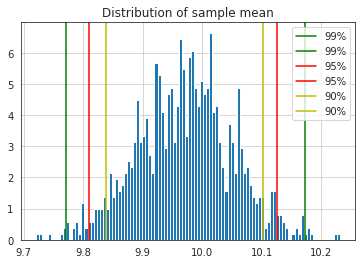

In [ ]:
ConfidenceInterval2(df, 'sex', 'female')

Confidence interval - sex : male
(581,)
Mean :  10.028485800344233
Std : 0.079272464479048
Confidence interval - 99% is : [ 9.81033614 10.21789587]
Confidence interval - 95% is : [ 9.87419966 10.17862392]
Confidence interval - 90% is : [ 9.89229174 10.1565938 ]


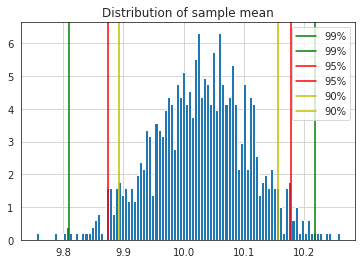

In [ ]:
ConfidenceInterval2(df, 'sex', 'male')

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> Confidence interval of mean viral load of men is not equal to female, which is already proved using Hypothesis 2 tail T test. Average viral load for males is little higher compared with female

<font color='#0dab7f'><b>Recommendation</b>: 
<font color='#0dab7f'> Hospitals / Employers should encourage male employees to get high insurance coverage to avoid sudden medical expenses such as covid 19.

<font color='33A2FF'><b>CONFIDENCE INTERVAL- To cross check the Hypothesis test, mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same 


In [ ]:
def ConfidenceInterval3(df, col1, category1, col2, category2):
  print("Confidence interval -", col1, " and ", col2,":", category1)
  df_p_f = df.loc[(df[col1]== category1) & (df[col2]== category2)]['viral load']
  print(df_p_f.shape)
  size = 1000
  bootstraped_means = np.empty(size)
  for i in range(size):
    bootstrapped_sample = df_p_f.sample(len(df_p_f), replace = True)
    x_bar = np.mean(bootstrapped_sample)
    bootstraped_means[i] = x_bar
  confidence_interval_99 = np.percentile(bootstraped_means, [0.5, 99.5])
  confidence_interval_95 = np.percentile(bootstraped_means, [2.5, 97.5])
  confidence_interval_90 = np.percentile(bootstraped_means, [5, 95])
  print("Mean : ",np.mean(bootstraped_means))
  print("Std :", np.std(bootstraped_means))
  print("Confidence interval - 99% is :", confidence_interval_99)
  print("Confidence interval - 95% is :", confidence_interval_95)
  print("Confidence interval - 90% is :", confidence_interval_90)
  plt.hist(bootstraped_means, bins = 100,  density=True)
  plt.title("Distribution of sample mean")
  plt.axvline(x=confidence_interval_99[0], c='g')
  plt.axvline(x=confidence_interval_99[1], c='g')
  plt.axvline(x=confidence_interval_95[0], c='r')
  plt.axvline(x=confidence_interval_95[1], c='r')
  plt.axvline(x=confidence_interval_90[0], c='y')
  plt.axvline(x=confidence_interval_90[1], c='y')
  plt.legend(['99%', '99%', '95%', '95%', '90%', '90%'])
  plt.grid()
  plt.show()

Confidence interval - sex  and  severity level : female
(268,)
Mean :  9.966032985074628
Std : 0.12114353159107488
Confidence interval - 99% is : [ 9.63622481 10.26231343]
Confidence interval - 95% is : [ 9.72629291 10.21250187]
Confidence interval - 90% is : [ 9.77227612 10.16570149]


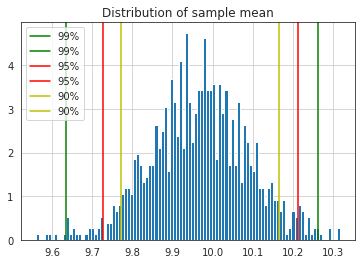

In [ ]:
ConfidenceInterval3(df, 'sex', 'female', 'severity level', 0)

Confidence interval - sex  and  severity level : female
(147,)
Mean :  9.91925163265306
Std : 0.1617632724380483
Confidence interval - 99% is : [ 9.54582211 10.33727279]
Confidence interval - 95% is : [ 9.61628571 10.22922959]
Confidence interval - 90% is : [ 9.66238776 10.18578912]


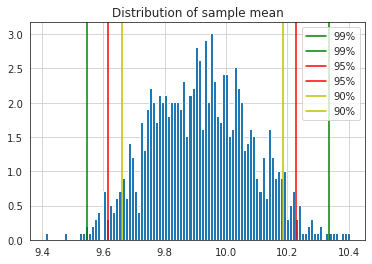

In [ ]:
ConfidenceInterval3(df, 'sex', 'female', 'severity level', 1)

Confidence interval - sex  and  severity level : female
(106,)
Mean :  9.935184245283018
Std : 0.20739761693267805
Confidence interval - 99% is : [ 9.40333632 10.46440425]
Confidence interval - 95% is : [ 9.52960849 10.34473113]
Confidence interval - 90% is : [ 9.5904434  10.27817453]


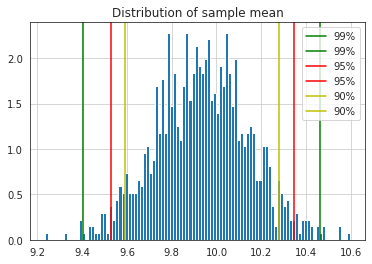

In [ ]:
ConfidenceInterval3(df, 'sex', 'female', 'severity level', 2)

<font color='#0dab7f'><b>Observation</b>: 

<font color='#0dab7f'> Confidence interval of mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are slightly different for different levels, which is already proved using Hypothesis one-way anova test

<font color='#0dab7f'><b>Recommendation</b>: 

<font color='#0dab7f'>1) Hospital can recommend insurance companies to cover the patients with high severity level people </font>

<font color='#0dab7f'>2) Government can stock more oxygen cylinders to deal with high severity people</font>

<font color='#0dab7f'>3) Government should bring awareness among the people such as social distancing, washing hands often, wearing masks and Quarantine themselves </font>

<font color='#0dab7f'><b>Observations and Inferences: </b>

<font color='#0dab7f'> 1)	Hospitalization charges for smoker is around 50000 and it is very high compared with non-smoker (20000).

<font color='#0dab7f'>2)	Hospitalization charges for female is little higher compared with males.

<font color='#0dab7f'>3)	Hospitalization charges for north east people of Delhi is high compared with other regions.

<font color='#0dab7f'>4)	Hospitalization charges for people with severity level 3 and 4 is high compared with other levels.

<font color='#0dab7f'>5)	Average age of people who are smoking are around 36 years.

<font color='#0dab7f'>6)	More count in north east region for Smoking people

<font color='#0dab7f'>7)	Male smoker is more when compared with female

<font color='#0dab7f'>8)	According to One tailed T test, P Value is 0 % which is less than alpha 5% so we reject Null hypothesis. Hence mean hospitalization charges of smoker is greater than non-smoker

<font color='#0dab7f'>9)	According to two tailed T test, P Value is 9.67 * 10^-6 % which is less than alpha 5% so we reject Null hypothesis. Hence mean viral loads of male and female is not same

<font color='#0dab7f'>10)	 According to chi square test, P Value is 0.897 which is more than alpha 0.05 so we fail to reject Null hypothesis. Hence smokers’ proportion is not significantly different in different regions

<font color='#0dab7f'>11)	 According to ANOVA test, P Value is 0% which is less than alpha 5% so we reject Null hypothesis. Hence mean viral load for female is different across severity level 0, 1, 2

<font color='#0dab7f'>12)	 Confidence interval of mean hospitalization charges of smoker is not overlapping with non-smoker. It also proves that mean hospitalization charges for smoker is greater than non-smoker and which is already proved using Hypothesis T-test right tailed.

<font color='#0dab7f'>13)	Confidence interval of mean viral load of men is not equal to female, which is already proved using Hypothesis 2 tail T test. Average viral load for males is little higher compared with female

<font color='#0dab7f'>14)	Confidence interval of mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are slightly different for different levels, which is already proved using Hypothesis one-way anova test

<font color='#0dab7f'>15) As the age of the persons increases, the charges also increases as there might be few other complications along with COVID-19 in older people.


<font color='#0dab7f'><b>Recommendation: </b>

<font color='#0dab7f'> 1) As Hospitalization charges for smoker is high and higher chance of getting disease, Hence Hospital/employers can recommend insurance companies 
which they have tie up to give higher insurance coverage for smoking people. Smoking/Tobacco awareness program should be given to smoking people.
They should be sent to Rehabilitation centre to stop the smoking habits.

<font color='#0dab7f'> 2) As Hospitalization charges for female is little high and to avoid financial crisis due to medical emergencies like covid 19, Hence Hospital/employers 
can recommend good insurance companies to cover females

<font color='#0dab7f'> 3) As Hospitalization charges for north east people of Delhi is little high, Hence Hospital can recommend insurance companies to cover north east region peoples.
Government can bring more oxygen cylinders to north east of Delhi as the hospitalization count is more. Government should bring awareness among the people such as 
social distancing, washing hands often, wearing masks and Quarantine themselves

<font color='#0dab7f'> 4) Hospital can recommend insurance companies to cover the patients with high severity level people. 
Government can stock more oxygen cylinders to deal with high severity people.

<font color='#0dab7f'> 5) As the smoking count is more among age group of 30-40 years. Smoking/Tobacco awareness program should be given to the age group of 30 to 40 years

<font color='#0dab7f'> 6) Smoking/Tobacco awareness program should be given to north east region of Delhi where the smoking people strength is more

<font color='#0dab7f'> 7) Hospitals/Employers should encourage male employees to get high insurance coverage to avoid sudden medical expenses such as covid 19.